**Обработка изображений** Лабораторная работа №3 (Виничук Тимофей)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
def houghLine(image):
    h, w = image.shape[0], image.shape[1]
    
    bin = cv2.Canny(image, 10, 20) 
    
    RMax = int(np.round(np.sqrt((h**2 + w**2))))
    thetas = np.deg2rad(np.arange(-90, 90))
    rs = np.linspace(-RMax, RMax, 2*RMax)

    accumulator = np.zeros((2 * RMax, len(thetas)))
    for y in range(h):
        for x in range(w):
         # Check if it is an edge pixel
         #  NB: y -> rows , x -> columns
            if bin[y,x] > 0:
                for k in range(len(thetas)):
                    r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])
                    accumulator[int(r) + RMax,k] += 1
    while np.max(accumulator)>60:
    
        #print ("max: " + str(np.max(accumulator)))
        idx = np.argmax(accumulator)
        rho = int(rs[int(idx / accumulator.shape[1])])
        theta = thetas[int(idx % accumulator.shape[1])]
        x0, y0, x1, x2 = 0, 0, 0, 0
        if (np.sin(theta)!=0):
            x0 = 0
            y0 = int(rho/np.sin(theta))
            x1 = image.shape[1]-1
            y1 = int((rho-(image.shape[1]-1)*np.cos(theta))/np.sin(theta))
        else:
            x0 = int(rho/np.cos(theta))
            y0 = 0
            x1 = int((rho-(image.shape[0]-1)*np.sin(theta))/np.cos(theta))
            y1 = image.shape[0]-1
        cv2.line(image, (x0, y0), (x1, y1), (0,255,0), 1)
        #print ("x0, y0: " + str(x0)+ ', '+str(y0)+ "  x1, y1: " + str(x1)+ ', '+str(y1))
        accumulator[int(idx / accumulator.shape[1]),int(idx % accumulator.shape[1])] = 0

    return image

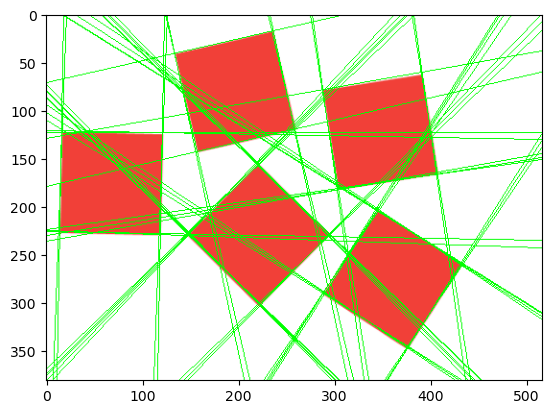

In [3]:
img = cv2.imread('cube.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
image = houghLine(img)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()
